In [4]:
import pandas as pd
import numpy as np
from pathlib import Path
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import os 

In [5]:


df = pd.read_csv("../data/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")


print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5217 entries, 0 to 5216
Columns: 403 entries, 0.a_token to 8.d.12_Treinando e aplicando LLM's para solucionar problemas de neg√≥cio.
dtypes: bool(1), float64(323), int64(1), object(78)
memory usage: 16.0+ MB
None


In [6]:
# Configurar caminhos
caminho_csv = Path("../data/Final Dataset - State of Data 2024 - Kaggle - df_survey_2024.csv")
caminho_pasta_data = caminho_csv.parent
nome_arquivo_excel = "analise_completa_colunas.xlsx"
caminho_excel = caminho_pasta_data / nome_arquivo_excel

# Verificar/instalar depend√™ncias
try:
    import openpyxl
except ImportError:
    print("Instalando openpyxl...")
    import subprocess
    subprocess.check_call(["pip", "install", "openpyxl"])
    import openpyxl

# Configura√ß√µes do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

try:
    # Carregar dados
    df = pd.read_csv(caminho_csv)
    
    # Criar an√°lise
    col_info = pd.DataFrame({
        'Coluna': df.columns,
        'Tipo': df.dtypes,
        'Nulos': df.isna().sum(),
        '% Nulos': (df.isna().mean() * 100).round(2),
        'Valores √önicos': df.nunique(),
        'Primeiro Valor': df.iloc[0]
    })
    
    # Exibir informa√ß√µes
    print("="*100)
    print("AN√ÅLISE COMPLETA DAS COLUNAS")
    print("="*100)
    with pd.option_context('display.max_rows', None):
        print(col_info)
    
    # Salvar na mesma pasta do CSV
    col_info.to_excel(caminho_excel, index=False, engine='openpyxl')
    print(f"\nRelat√≥rio salvo em: {caminho_excel}")
    
    # An√°lise adicional
    print("\n" + "="*100)
    print("DADOS ESTAT√çSTICOS")
    print("="*100)
    print(f"Total de colunas: {len(df.columns)}")
    print(f"Total de linhas: {len(df)}")
    print("\nDistribui√ß√£o de tipos:")
    print(df.dtypes.value_counts())

except FileNotFoundError:
    print(f"\nERRO: Arquivo n√£o encontrado em: {caminho_csv}")
    print("Verifique se o caminho est√° correto e se o arquivo existe")

except Exception as e:
    print(f"\nERRO: {str(e)}")

Instalando openpyxl...


ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
# Sele√ß√£o e renomea√ß√£o de colunas do Bloco 1: Perfil Pessoal e Educacional
df_perfil = df[
    [
        '1.a_idade',
        '1.a.1_faixa_idade',
        '1.b_genero',
        '1.c_cor/raca/etnia',
        '1.d_pcd',
        '1.m_√°rea_de_forma√ß√£o',
        '1.i_estado_onde_mora'
    ]
].rename(columns={
    '1.a_idade': 'idade',
    '1.a.1_faixa_idade': 'faixa_idade',
    '1.b_genero': 'genero',
    '1.c_cor/raca/etnia': 'raca',
    '1.d_pcd': 'pcd',
    '1.m_√°rea_de_forma√ß√£o': 'formacao',
    '1.i_estado_onde_mora': 'estado'
})

# Exibir as primeiras linhas para ver como ficou
df_perfil.head()


idade faixa_idade     genero    raca  pcd                                                          formacao                  estado
0     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Rio Grande do Sul (RS)
1     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI     Santa Catarina (SC)
2     18       17-21  Masculino   Parda  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)
3     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)
4     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)

In [ ]:

# Limpeza e Padroniza√ß√£o dos Dados do Bloco 1


# Verificar valores nulos
print("Valores nulos antes da limpeza:")
print(df_perfil.isnull().sum())

# Padronizar G√™nero
genero_map = {
    'Masculino': 'Masculino',
    'masculino': 'Masculino',
    'Feminino': 'Feminino',
    'feminino': 'Feminino',
    'N√£o bin√°rio': 'N√£o bin√°rio',
    'Outro': 'Outro',
    'Prefiro n√£o dizer': 'N√£o informado',
    'Prefiro n√£o responder': 'N√£o informado',
    '': 'N√£o informado',
    None: 'N√£o informado'
}
df_perfil['genero'] = df_perfil['genero'].map(genero_map).fillna('N√£o informado')

# Padronizar Ra√ßa
raca_map = {
    'Branca': 'Branca',
    'Preta': 'Preta',
    'Parda': 'Parda',
    'Amarela': 'Amarela',
    'Ind√≠gena': 'Ind√≠gena',
    'Outro': 'Outro',
    'Prefiro n√£o dizer': 'N√£o informado',
    '': 'N√£o informado',
    None: 'N√£o informado'
}
df_perfil['raca'] = df_perfil['raca'].map(raca_map).fillna('N√£o informado')

# Padronizar PCD
pcd_map = {
    'Sim': 'Sim',
    'N√£o': 'N√£o',
    'Prefiro n√£o dizer': 'N√£o informado',
    '': 'N√£o informado',
    None: 'N√£o informado'
}
df_perfil['pcd'] = df_perfil['pcd'].map(pcd_map).fillna('N√£o informado')

# Padronizar Forma√ß√£o Acad√™mica

df_perfil['formacao'] = df_perfil['formacao'].fillna('N√£o informado').replace('', 'N√£o informado')



# Padronizar Estado 
# Aqui apenas preencher nulos com 'N√£o informado' caso existam
df_perfil['estado'] = df_perfil['estado'].fillna('N√£o informado')

# Converter idade em n√∫mero
df_perfil['idade'] = pd.to_numeric(df_perfil['idade'], errors='coerce')

# Revisar novamente os nulos
print("\nValores nulos ap√≥s a limpeza:")
print(df_perfil.isnull().sum())

# Exibir primeiras linhas conferindo
df_perfil.head()


Valores nulos antes da limpeza:
idade            0
faixa_idade      0
genero           0
raca             0
pcd              0
formacao        94
estado         139
dtype: int64

Valores nulos ap√≥s a limpeza:
idade          0
faixa_idade    0
genero         0
raca           0
pcd            0
formacao       0
estado         0
dtype: int64


idade faixa_idade     genero    raca  pcd                                                          formacao                  estado
0     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Rio Grande do Sul (RS)
1     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI     Santa Catarina (SC)
2     18       17-21  Masculino   Parda  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)
3     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)
4     18       17-21  Masculino  Branca  N√£o  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI          S√£o Paulo (SP)

In [ ]:
# Agrupamento Inteligente da Forma√ß√£o Acad√™mica

def agrupar_formacao(valor):
    if pd.isna(valor) or valor in ['', 'N√£o informado', 'Prefiro n√£o dizer']:
        return 'N√£o informado'
    
    v = valor.lower()
    
    if 'computa√ß√£o' in v or 'informa√ß√£o' in v or 'sistemas' in v or 'tecnologia' in v or 'an√°lise e desenvolvimento' in v:
        return 'Computa√ß√£o/TI'
    
    if 'estat√≠stica' in v or 'matem√°tica' in v:
        return 'Estat√≠stica/Matem√°tica'
    
    if 'engenharia' in v:
        return 'Engenharias'
    
    if 'administra√ß√£o' in v or 'economia' in v:
        return 'Administra√ß√£o/Economia'
    
    if 'sociologia' in v or 'psicologia' in v or 'pedagogia' in v or 'ci√™ncias sociais' in v or 'ci√™ncia pol√≠tica' in v:
        return 'Ci√™ncias Sociais/Humanas'
    
    if 'medicina' in v or 'biologia' in v or 'farm√°cia' in v or 'enfermagem' in v:
        return 'Sa√∫de/Biol√≥gicas'
    
    return 'Outra Forma√ß√£o'

# Aplicar fun√ß√£o
df_perfil['formacao_macro'] = df_perfil['formacao'].apply(agrupar_formacao)

# Conferir distribui√ß√£o
print("\nDistribui√ß√£o ap√≥s agrupamento:")
print(df_perfil['formacao_macro'].value_counts())

# Visualizar primeiras linhas
df_perfil[['formacao', 'formacao_macro']].head()



Distribui√ß√£o ap√≥s agrupamento:
formacao_macro
Computa√ß√£o/TI               2076
Engenharias                 1062
Administra√ß√£o/Economia       779
Estat√≠stica/Matem√°tica       477
Outra Forma√ß√£o               412
Ci√™ncias Sociais/Humanas     181
Sa√∫de/Biol√≥gicas             136
N√£o informado                 94
Name: count, dtype: int64


formacao formacao_macro
0  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Computa√ß√£o/TI
1  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Computa√ß√£o/TI
2  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Computa√ß√£o/TI
3  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Computa√ß√£o/TI
4  Computa√ß√£o / Engenharia de Software / Sistemas de Informa√ß√£o/ TI  Computa√ß√£o/TI

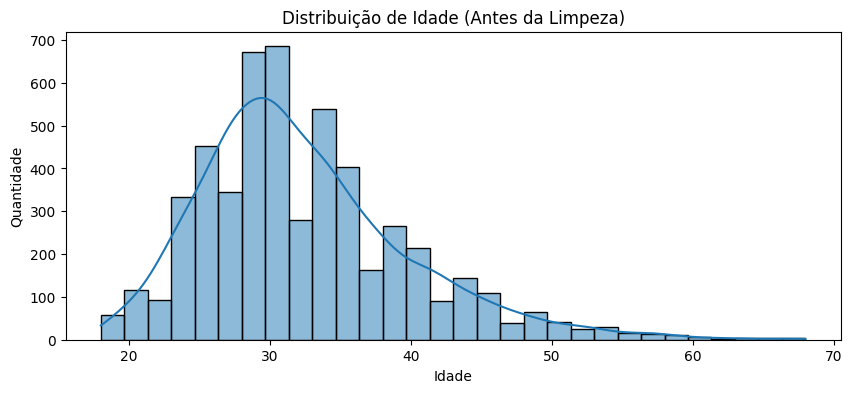


Estat√≠sticas descritivas:
count    5217.000000
mean       32.358827
std         7.419433
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        68.000000
Name: idade, dtype: float64

Quantidade de outliers detectados: 0


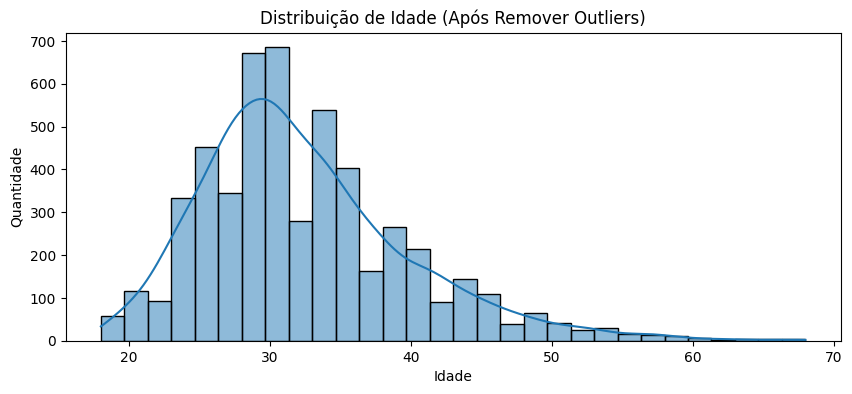


Estat√≠sticas ap√≥s limpeza:
count    5217.000000
mean       32.358827
std         7.419433
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        68.000000
Name: idade, dtype: float64


In [ ]:
# An√°lise e Tratamento de Outliers de Idade

# Ver distribui√ß√£o geral
plt.figure(figsize=(10, 4))
sns.histplot(df_perfil['idade'], bins=30, kde=True)
plt.title('Distribui√ß√£o de Idade (Antes da Limpeza)')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

# Ver estat√≠sticas descritivas
print("\nEstat√≠sticas descritivas:")
print(df_perfil['idade'].describe())

# Definir limites plaus√≠veis
idade_min = 15
idade_max = 90

# Contar quantos outliers existem
outliers = df_perfil[(df_perfil['idade'] < idade_min) | (df_perfil['idade'] > idade_max)]
print(f"\nQuantidade de outliers detectados: {len(outliers)}")

# Filtrar idades fora dos limites
df_perfil.loc[(df_perfil['idade'] < idade_min) | (df_perfil['idade'] > idade_max), 'idade'] = None

# Conferir novamente
plt.figure(figsize=(10, 4))
sns.histplot(df_perfil['idade'], bins=30, kde=True)
plt.title('Distribui√ß√£o de Idade (Ap√≥s Remover Outliers)')
plt.xlabel('Idade')
plt.ylabel('Quantidade')
plt.show()

print("\nEstat√≠sticas ap√≥s limpeza:")
print(df_perfil['idade'].describe())


In [ ]:
fig = px.histogram(
    df_perfil,
    x="pcd",
    color="pcd",
    title="Distribui√ß√£o Geral de Pessoas com Defici√™ncia (PCD)",
    text_auto=True,
    labels={"pcd": "Situa√ß√£o PCD", "count": "N√∫mero de Respondentes"}
)

fig.update_layout(
    bargap=0.3,
    showlegend=False,
    template="plotly_white",
    xaxis_title="Situa√ß√£o PCD",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()

In [ ]:
# Distribui√ß√£o por G√™nero com Plotly Express

fig = px.histogram(
    df_perfil,
    x="genero",
    color="genero",
    title="Distribui√ß√£o por G√™nero",
    labels={"genero": "G√™nero"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="G√™nero",
    yaxis_title="Quantidade de Respondentes",
    showlegend=False,
    bargap=0.2
)

fig.show()


In [ ]:
# Distribui√ß√£o por Ra√ßa/Cor

fig = px.histogram(
    df_perfil,
    x="raca",
    color="raca",
    title="Distribui√ß√£o de Respondentes por Ra√ßa/Cor",
    labels={"raca": "Ra√ßa/Cor", "count": "N√∫mero de Respondentes"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="Ra√ßa/Cor",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white"
)

fig.show()


In [ ]:
# Distribui√ß√£o por Forma√ß√£o Acad√™mica (Agrupada)

fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="formacao_macro",
    title="Distribui√ß√£o por √Årea de Forma√ß√£o Acad√™mica (Agrupada)",
    labels={"formacao_macro": "√Årea de Forma√ß√£o (Macro)", "count": "N√∫mero de Respondentes"},
    text_auto=True
)

fig.update_layout(
    xaxis_title="√Årea de Forma√ß√£o (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white",
)

fig.show()


In [ ]:
# Distribui√ß√£o por Estado (UF)


# Criar um dicion√°rio com o nome completo ‚Üí sigla (poderia ser carregado de uma fonte externa tamb√©m)
siglas_estados = {
    'Acre (AC)': 'AC', 'Alagoas (AL)': 'AL', 'Amap√° (AP)': 'AP', 'Amazonas (AM)': 'AM', 'Bahia (BA)': 'BA',
    'Cear√° (CE)': 'CE', 'Distrito Federal (DF)': 'DF', 'Esp√≠rito Santo (ES)': 'ES', 'Goi√°s (GO)': 'GO',
    'Maranh√£o (MA)': 'MA', 'Mato Grosso (MT)': 'MT', 'Mato Grosso do Sul (MS)': 'MS', 'Minas Gerais (MG)': 'MG',
    'Par√° (PA)': 'PA', 'Para√≠ba (PB)': 'PB', 'Paran√° (PR)': 'PR', 'Pernambuco (PE)': 'PE', 'Piau√≠ (PI)': 'PI',
    'Rio de Janeiro (RJ)': 'RJ', 'Rio Grande do Norte (RN)': 'RN', 'Rio Grande do Sul (RS)': 'RS',
    'Rond√¥nia (RO)': 'RO', 'Roraima (RR)': 'RR', 'Santa Catarina (SC)': 'SC', 'S√£o Paulo (SP)': 'SP',
    'Sergipe (SE)': 'SE', 'Tocantins (TO)': 'TO'
}

# Aplicar as siglas ao DataFrame
df_perfil['estado_sigla'] = df_perfil['estado'].map(siglas_estados).fillna(df_perfil['estado'])

# Gerar o gr√°fico com as siglas
fig = px.histogram(
    df_perfil,
    x="estado_sigla",
    color="estado_sigla",
    title="Distribui√ß√£o Geogr√°fica por Estado (Siglas)",
    labels={"estado_sigla": "Estado", "count": "N√∫mero de Respondentes"},
    text_auto=True
)

# texto acima das barras
fig.update_traces(textposition='outside')  # For√ßa texto sempre fora da barra

fig.update_layout(
    xaxis_title="Estado (Sigla)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.3,
    showlegend=False,
    template="plotly_white"
)

fig.show()



In [ ]:
# G√™nero X Forma√ß√£o Acad√™mica (Agrupada)

# Calcular o m√°ximo de contagem por grupo para definir o limite do eixo Y
counts = df_perfil.groupby(["formacao_macro", "genero"]).size().reset_index(name='count')
y_max = counts['count'].max()

# Gr√°fico
fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="genero",
    barmode="group",
    title="Distribui√ß√£o por √Årea de Forma√ß√£o Acad√™mica (Agrupada) por G√™nero",
    labels={"formacao_macro": "√Årea de Forma√ß√£o (Macro)", "genero": "G√™nero", "count": "N√∫mero de Respondentes"},
    text_auto=True
)

# For√ßar os textos fora da barra
fig.update_traces(textposition='outside')

# Layout com margem de seguran√ßa no eixo Y
fig.update_layout(
    xaxis_title="√Årea de Forma√ß√£o (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    yaxis=dict(range=[0, y_max * 1.2])
)

fig.show()



In [ ]:
# Ra√ßa x Forma√ß√£o Acad√™mica (Agrupada)
fig = px.histogram(
    df_perfil,
    x="formacao_macro",
    color="raca",
    barmode="group",
    title="Distribui√ß√£o por √Årea de Forma√ß√£o Acad√™mica (Agrupada) por Ra√ßa/Cor",
    labels={"formacao_macro": "√Årea de Forma√ß√£o (Macro)", "raca": "Ra√ßa/Cor", "count": "N√∫mero de Respondentes"},
    text_auto=True
)

fig.update_layout(
    width=1800,  # aumenta a largura da figura
    height=600,
    xaxis_title="√Årea de Forma√ß√£o (Macro)",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    margin=dict(l=40, r=40, t=80, b=200),
)

fig.update_traces(
    textposition='outside'
)

fig.show()


# Bloco 6

In [ ]:
# Selecionar colunas do Bloco 6 (rotina e atividades)
colunas_bloco6 = (
    ['6.a_rotina_como_de'] +
    [f'6.a.{i}' for i in range(1, 10)] +
    ['6.h_maior_tempo_gasto_como_de'] +
    [f'6.h.{i}' for i in range(1, 10)]
)

# Verificar quais colunas existem (√†s vezes faltam no CSV)
colunas_existentes = [col for col in colunas_bloco6 if col in df.columns]

# Criar df somente com essas colunas
df_eng_dados = df[colunas_existentes].copy()

# Unir com df_perfil (Bloco 1)
df_eng_dados_completo = pd.concat([df_perfil, df_eng_dados], axis=1)

# Filtrar quem realmente respondeu a se√ß√£o de Engenharia de Dados
df_engativos = df_eng_dados_completo[df_eng_dados_completo['6.a_rotina_como_de'].notna()]

# Adicionar print informativo
print(f"Total de engenheiros de dados identificados: {len(df_engativos)}")


Total de engenheiros de dados identificados: 929


In [ ]:
fig = px.histogram(
    df_engativos,
    x="formacao_macro",
    color="formacao_macro",
    title="Engenharia de Dados: Forma√ß√£o Acad√™mica dos Profissionais",
    text_auto=True
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()


In [ ]:
fig = px.histogram(
    df_engativos,
    x="genero",
    color="genero",
    title="üë• G√™nero dos Profissionais de Engenharia de Dados",
    text_auto=True,
    labels={"genero": "G√™nero", "count": "N√∫mero de Respondentes"}
)

fig.update_layout(
    bargap=0.2,
    showlegend=False,
    template="plotly_white",
    xaxis_title="G√™nero",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()


In [ ]:
fig = px.histogram(
    df_engativos,
    x="faixa_idade",
    color="faixa_idade",
    title="üìä Faixa Et√°ria dos Engenheiros de Dados",
    text_auto=True,
    labels={"faixa_idade": "Faixa Et√°ria", "count": "N√∫mero de Respondentes"}
)

fig.update_layout(
    bargap=0.15,
    showlegend=False,
    template="plotly_white",
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Quantidade de Respondentes"
)

fig.show()


In [ ]:
# Contagem m√°xima para ajustar o eixo y
counts_raca = df_engativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_engativos,
    x="raca",
    color="raca",
    barmode="group",
    title="Distribui√ß√£o de Ra√ßa/Cor entre Engenheiros de Dados",
    labels={
        "raca": "Ra√ßa/Cor",
        "count": "N√∫mero de Respondentes"
    },
    text_auto=True
)

fig.update_traces(
    textposition='outside'
)

fig.update_layout(
    xaxis_title="Ra√ßa/Cor",
    yaxis_title="Quantidade de Respondentes",
    title_font_size=20,
    bargap=0.2,
    template="plotly_white",
    showlegend=False,
    yaxis=dict(range=[0, y_max * 1.2])
)

fig.show()

In [ ]:


# Lista correta das colunas do bloco 6.h
colunas_atividades = [
    '6.h.1_Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.',
    '6.h.2_Realizando constru√ß√µes de ETL\\s em ferramentas como Pentaho, Talend, Dataflow etc.',
    '6.h.3_Criando consultas atrav√©s da linguagem SQL para exportar informa√ß√µes e compartilhar com as √°reas de neg√≥cio.',
    '6.h.4_Atuando na integra√ß√£o de diferentes fontes de dados atrav√©s de plataformas propriet√°rias como Stitch Data, Fivetran etc.',
    '6.h.5_Modelando solu√ß√µes de arquitetura de dados, criando componentes de ingest√£o de dados, transforma√ß√£o e recupera√ß√£o da informa√ß√£o.',
    '6.h.6_Desenvolvendo/cuidando da manuten√ß√£o de reposit√≥rios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.',
    '6.h.7_Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.',
    '6.h.8_Cuidando da qualidade dos dados, metadados e dicion√°rio de dados.',
    '6.h.9_Nenhuma das op√ß√µes listadas refletem meu dia a dia.'
]

# Contar quantos responderam "1" (ou True) para cada atividade
contagens = []
for col in colunas_atividades:
    if df[col].dtype == object:
        contagem = df[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df[col].fillna(0).astype(int).sum()
    contagens.append((col.split('_', 1)[1], contagem))  # usar s√≥ o texto da pergunta

# Criar DataFrame com os dados
df_atividades = pd.DataFrame(contagens, columns=["Atividade", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Gerar gr√°fico
fig = px.bar(
    df_atividades,
    x="Frequ√™ncia",
    y="Atividade",
    orientation="h",
    title="üîß Atividades Mais Frequentes na Engenharia de Dados (Respostas M√∫ltiplas)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Sele√ß√µes",
    yaxis_title="Atividade"
)

fig.show()



In [ ]:


# Lista de atividades
colunas_atividades = [
    '6.h.1_Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.',
    '6.h.2_Realizando constru√ß√µes de ETL\\s em ferramentas como Pentaho, Talend, Dataflow etc.',
    '6.h.3_Criando consultas atrav√©s da linguagem SQL para exportar informa√ß√µes e compartilhar com as √°reas de neg√≥cio.',
    '6.h.4_Atuando na integra√ß√£o de diferentes fontes de dados atrav√©s de plataformas propriet√°rias como Stitch Data, Fivetran etc.',
    '6.h.5_Modelando solu√ß√µes de arquitetura de dados, criando componentes de ingest√£o de dados, transforma√ß√£o e recupera√ß√£o da informa√ß√£o.',
    '6.h.6_Desenvolvendo/cuidando da manuten√ß√£o de reposit√≥rios de dados baseados em streaming de eventos como Data Lakes e Data Lakehouses.',
    '6.h.7_Atuando na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts, Datasets etc.',
    '6.h.8_Cuidando da qualidade dos dados, metadados e dicion√°rio de dados.',
    '6.h.9_Nenhuma das op√ß√µes listadas refletem meu dia a dia.'
]

# Filtrar DataFrame
df_engativos = df[df['6.a_rotina_como_de'].notna()].copy()

# Gerar contagens
dados_explodidos = []
for col in colunas_atividades:
    col_nome = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col] == 1) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame final
df_ativ_faixa = pd.DataFrame(dados_explodidos)

# Conferir que agora h√° frequ√™ncias diferentes de zero
print(df_ativ_faixa)

# Gr√°fico
# Pivotar
heatmap_data = df_ativ_faixa.pivot_table(
    index="Atividade",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Gerar heatmap
fig = px.imshow(
    heatmap_data.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="üîß Distribui√ß√£o de Atividades por Faixa Et√°ria (Heatmap)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Atividade",
    height=800
)

fig.show()



                                                                                              Atividade Faixa Et√°ria  Frequ√™ncia
0   Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.        17-21          16
1   Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.        22-24          49
2   Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.        25-29         185
3   Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.        30-34         154
4   Desenvolvendo pipelines de dados utilizando linguagens de programa√ß√£o como Python, Scala, Java etc.        35-39          84
..                                                                                                  ...          ...         ...
76                                                  Nenhuma das op√ß√µes listadas ref

# Bloco 6b

In [ ]:
# Verificar colunas relacionadas ao bloco 6.b
colunas_6b = [col for col in df.columns if col.startswith("6.b.")]
print(f"Total de colunas no Bloco 6.b: {len(colunas_6b)}")
print("Exemplo de colunas:\n", colunas_6b[:5])

Total de colunas no Bloco 6.b: 21
Exemplo de colunas:
 ['6.b.1_Scripts Python', '6.b.2_SQL & Stored Procedures', '6.b.3_Apache Airflow', '6.b.4_Apache NiFi', '6.b.5_Luigi']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 6
df_engativos = df[df["6.a_rotina_como_de"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_6b = []
for col in colunas_6b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_6b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequ√™ncia
df_ferramentas_6b = pd.DataFrame(contagens_6b, columns=["Ferramenta", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Visualizar
df_ferramentas_6b

Ferramenta  Frequ√™ncia
4                                    Luigi           1
9                                   Stitch           7
14                              SAP BW ETL           8
6                                   Talend           9
13                           IBM DataStage          10
18                                   Knime          10
16                    SAS Data Integration          14
8                                  Alteryx          14
20          N√£o utilizo ferramentas de ETL          14
17                              Qlik Sense          14
10                                Fivetran          20
12                  Oracle Data Integrator          28
3                              Apache NiFi          41
7                                  Pentaho          48
11                         Google Dataflow          74
15  SQL Server Integration Services (SSIS)          77
5                                 AWS Glue         181
19                              Databricks         347
2                           Apache Airflow         407
1                  SQL & Stored Procedures         641
0                           Scripts Python         761

In [ ]:

# Gr√°fico de barras horizontal
fig = px.bar(
    df_ferramentas_6b,
    x="Frequ√™ncia",
    y="Ferramenta",
    orientation="h",
    title="üõ†Ô∏è Ferramentas Mais Utilizadas por Profissionais de Engenharia de Dados (Bloco 6.b)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Sele√ß√µes",
    yaxis_title="Ferramenta"
)

fig.show()

In [ ]:
# Construir DataFrame cruzando ferramenta com faixa et√°ria
dados_explodidos_6b = []

for col in colunas_6b:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_6b.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_6b)

In [ ]:


# Pivotar os dados para formato de matriz
heatmap_6b = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_6b.set_index("Ferramenta"),
    labels=dict(color="Qtd de Sele√ß√µes"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de Engenharia de Dados por Faixa Et√°ria (Bloco 6.b)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()


# Bloco 7

In [ ]:
# Confirme que df e df_perfil est√£o carregados e prontos

# Selecionar colunas do Bloco 7
colunas_bloco7 = (
    ['7.a_rotina_como_da'] +
    [f'7.a.{i}' for i in range(1, 11)]
)

# Verificar quais colunas existem
colunas_existentes = [col for col in colunas_bloco7 if col in df.columns]

# Criar DataFrame com essas colunas
df_da = df[colunas_existentes].copy()

# Unir com perfil
df_da_completo = pd.concat([df_perfil, df_da], axis=1)

# Filtrar respondentes
df_da_ativos = df_da_completo[df_da_completo['7.a_rotina_como_da'].notna()]

print(f"Total de profissionais de Data Analysis identificados: {len(df_da_ativos)}")



Total de profissionais de Data Analysis identificados: 1669


In [ ]:
# Faixa et√°ria
fig = px.histogram(
    df_da_ativos,
    x="faixa_idade",
    color="faixa_idade",
    title="Faixa Et√°ria dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"faixa_idade": "Faixa Et√°ria", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# G√™nero
fig = px.histogram(
    df_da_ativos,
    x="genero",
    color="genero",
    title="G√™nero dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"genero": "G√™nero", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Forma√ß√£o
fig = px.histogram(
    df_da_ativos,
    x="formacao_macro",
    color="formacao_macro",
    title="Forma√ß√£o Acad√™mica dos Profissionais de Data Analysis",
    text_auto=True,
    labels={"formacao_macro": "Forma√ß√£o", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Ra√ßa/cor
counts_raca = df_da_ativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_da_ativos,
    x="raca",
    color="raca",
    barmode="group",
    title="Distribui√ß√£o de Ra√ßa/Cor em Data Analysis",
    labels={"raca": "Ra√ßa/Cor", "count": "N√∫mero de Respondentes"},
    text_auto=True
)
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, y_max * 1.2]),
    showlegend=False
)
fig.show()

In [ ]:
# Filtrar apenas quem respondeu algo no bloco 7
df_da_ativos = df[df["7.a.1_Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc."].notna()].copy()

print(f"Total de profissionais do Bloco 7 identificados: {len(df_da_ativos)}")

# Coletar automaticamente as colunas de atividades do bloco 7
colunas_atividades_7 = [c for c in df_da_ativos.columns if c.startswith('7.a.')]

# Contar respostas por atividade
contagens = []
for col in colunas_atividades_7:
    if df_da_ativos[col].dtype == object:
        contagem = df_da_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_da_ativos[col].fillna(0).astype(int).sum()
    contagens.append((col.split('_', 1)[1], contagem))

# Criar DataFrame de frequ√™ncias
df_atividades_da = pd.DataFrame(contagens, columns=["Atividade", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Gerar gr√°fico
import plotly.express as px

fig = px.bar(
    df_atividades_da,
    x="Frequ√™ncia",
    y="Atividade",
    orientation="h",
    title="üîß Atividades Mais Frequentes em Data Analytics (Bloco 7)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Sele√ß√µes",
    yaxis_title="Atividade"
)

fig.show()


Total de profissionais do Bloco 7 identificados: 1669


In [ ]:
colunas_atividades_7 = [
    '7.a.1_Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.',
    '7.a.2_Realizo constru√ß√µes de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik etc.',
    '7.a.3_Crio consultas atrav√©s da linguagem SQL para exportar informa√ß√µes e compartilhar com as √°reas de neg√≥cio.',
    '7.a.4_Utilizo API\\s para extrair dados e complementar minhas an√°lises.',
    '7.a.5_Realizo experimentos e estudos utilizando metodologias estat√≠sticas como teste de hip√≥tese, modelos de regress√£o etc.',
    '7.a.6_Desenvolvo/cuido da manuten√ß√£o de ETL\\s utilizando tecnologias como Talend, Pentaho, Airflow, Dataflow etc.',
    '7.a.7_Atuo na modelagem dos dados, com o objetivo de criar conjuntos de dados como Data Warehouses, Data Marts etc.',
    '7.a.8_Desenvolvo/cuido da manuten√ß√£o de planilhas para atender as √°reas de neg√≥cio.',
    '7.a.9_Utilizo ferramentas avan√ßadas de estat√≠stica como SAS, SPSS, Stata etc, para realizar an√°lises de dados.',
    '7.a.10_Nenhuma das op√ß√µes listadas refletem meu dia a dia.'
]

df_da_ativos = df[df['7.a_rotina_como_da'].notna()].copy()

dados_explodidos = []
for col in colunas_atividades_7:
    col_nome = col.split("_", 1)[1]
    for faixa in df_da_ativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_da_ativos[
            (df_da_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_da_ativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

df_ativ_faixa = pd.DataFrame(dados_explodidos)
print(df_ativ_faixa)

heatmap_data = df_ativ_faixa.pivot_table(
    index="Atividade",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

fig = px.imshow(
    heatmap_data.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="üîµ Distribui√ß√£o de Atividades por Faixa Et√°ria (Data Analysis)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Atividade",
    height=800
)

fig.show()


                                                                            Atividade Faixa Et√°ria  Frequ√™ncia
0   Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.        17-21          32
1   Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.        22-24         119
2   Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.        25-29         326
3   Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.        30-34         256
4   Processo e analiso dados utilizando linguagens de programa√ß√£o como Python, R etc.        35-39          98
..                                                                                ...          ...         ...
85                                Nenhuma das op√ß√µes listadas refletem meu dia a dia.        35-39           6
86                                Nenhuma das op√ß√µes listadas refletem meu dia a dia.        40-

# Bloco 7B


In [ ]:
# Verificar colunas relacionadas ao bloco 7.b
colunas_7b = [col for col in df.columns if col.startswith("7.b.")]
print(f"Total de colunas no Bloco 7.b: {len(colunas_7b)}")
print("Exemplo de colunas:\n", colunas_7b[:5])

Total de colunas no Bloco 7.b: 21
Exemplo de colunas:
 ['7.b.1_Scripts Python', '7.b.2_SQL & Stored Procedures', '7.b.3_Apache Airflow', '7.b.4_Apache NiFi', '7.b.5_Luigi']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 7
df_engativos = df[df["7.a_rotina_como_da"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_7b = []
for col in colunas_7b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_7b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequ√™ncia
df_ferramentas_7b = pd.DataFrame(contagens_7b, columns=["Ferramenta", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Visualizar
df_ferramentas_7b

Ferramenta  Frequ√™ncia
4                                    Luigi           1
9                                   Stitch           3
3                              Apache NiFi           8
10                                Fivetran           9
14                              SAP BW ETL           9
6                                   Talend          10
13                           IBM DataStage          11
12                  Oracle Data Integrator          17
16                    SAS Data Integration          27
18                                   Knime          29
8                                  Alteryx          36
11                         Google Dataflow          41
17                              Qlik Sense          52
5                                 AWS Glue          68
7                                  Pentaho          75
15  SQL Server Integration Services (SSIS)          81
2                           Apache Airflow         151
20          N√£o utilizo ferramentas de ETL         267
19                              Databricks         380
1                  SQL & Stored Procedures         801
0                           Scripts Python         845

In [ ]:
# Construir DataFrame cruzando ferramenta com faixa et√°ria
dados_explodidos_7b = []

for col in colunas_7b:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_7b.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_7b)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_7b = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_7b.set_index("Ferramenta"),
    labels=dict(color="Qtd de Sele√ß√µes"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de DA por Faixa Et√°ria (Bloco 7.b)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()


# Bloco 8

In [ ]:

# Gr√°fico de barras horizontal
fig = px.bar(
    df_ferramentas_7b,
    x="Frequ√™ncia",
    y="Ferramenta",
    orientation="h",
    title="üõ†Ô∏è Ferramentas Mais Utilizadas por Profissionais de Engenharia de Dados (Bloco 6.b)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Sele√ß√µes",
    yaxis_title="Ferramenta"
)

fig.show()

In [ ]:

# Selecionar colunas do Bloco 8
colunas_bloco8 = ['8.a_rotina_como_ds'] + [f'8.a.{i}' for i in range(1, 11)]

# Verificar quais colunas existem
colunas_existentes_8 = [col for col in colunas_bloco8 if col in df.columns]

# Criar DataFrame com essas colunas
df_ml = df[colunas_existentes_8].copy()

# Unir com o perfil
df_ml_completo = pd.concat([df_perfil, df_ml], axis=1)

# Filtrar respondentes ativos
df_ml_ativos = df_ml_completo[df_ml_completo['8.a_rotina_como_ds'].notna()]

print(f"Total de profissionais de Machine Learning identificados: {len(df_ml_ativos)}")


Total de profissionais de Machine Learning identificados: 773


In [ ]:
# Faixa Et√°ria
fig = px.histogram(
    df_ml_ativos,
    x="faixa_idade",
    color="faixa_idade",
    title="üìÜ Faixa Et√°ria dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"faixa_idade": "Faixa Et√°ria", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()



In [ ]:
# G√™nero
fig = px.histogram(
    df_ml_ativos,
    x="genero",
    color="genero",
    title="üë§ G√™nero dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"genero": "G√™nero", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()

In [ ]:
# Forma√ß√£o Acad√™mica
fig = px.histogram(
    df_ml_ativos,
    x="formacao_macro",
    color="formacao_macro",
    title="üéì Forma√ß√£o Acad√™mica dos Profissionais de Machine Learning",
    text_auto=True,
    labels={"formacao_macro": "Forma√ß√£o", "count": "N√∫mero de Respondentes"}
)
fig.update_layout(bargap=0.2, showlegend=False)
fig.show()


In [ ]:
# Ra√ßa/Cor
counts_raca = df_ml_ativos.groupby("raca").size().reset_index(name="count")
y_max = counts_raca["count"].max()

fig = px.histogram(
    df_ml_ativos,
    x="raca",
    color="raca",
    barmode="group",
    title="üé® Distribui√ß√£o de Ra√ßa/Cor em Machine Learning",
    labels={"raca": "Ra√ßa/Cor", "count": "N√∫mero de Respondentes"},
    text_auto=True
)
fig.update_traces(textposition="outside")
fig.update_layout(
    yaxis=dict(range=[0, y_max * 1.2]),
    showlegend=False
)
fig.show()

In [ ]:
# Coletar colunas do bloco 8
colunas_atividades_8 = [c for c in df.columns if c.startswith('8.a.')]

# Verificar se h√° pelo menos uma para usar como refer√™ncia
if colunas_atividades_8:
    primeira_coluna = colunas_atividades_8[0]

    # Filtrar apenas quem respondeu √† primeira pergunta do Bloco 8
    df_ml_ativos = df[df[primeira_coluna].notna()].copy()

    print(f"Total de profissionais do Bloco 8 identificados: {len(df_ml_ativos)}")

    # Contar respostas por atividade
    contagens = []
    for col in colunas_atividades_8:
        if df_ml_ativos[col].dtype == object:
            contagem = df_ml_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
        else:
            contagem = df_ml_ativos[col].fillna(0).astype(int).sum()
        contagens.append((col.split('_', 1)[1], contagem))

    # Criar DataFrame de frequ√™ncias
    df_atividades_ml = pd.DataFrame(contagens, columns=["Atividade", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

    # Gr√°fico
    import plotly.express as px
    fig = px.bar(
        df_atividades_ml,
        x="Frequ√™ncia",
        y="Atividade",
        orientation="h",
        title="üß† Atividades Mais Frequentes em DS (Bloco 8)",
        text_auto=True
    )
    fig.update_layout(
        template="plotly_white",
        height=700,
        xaxis_title="Quantidade de Sele√ß√µes",
        yaxis_title="Atividade"
    )
    fig.show()
else:
    print("Nenhuma coluna do bloco 8 encontrada.")



Total de profissionais do Bloco 8 identificados: 773


In [ ]:
# Lista de atividades do Bloco 8 (Machine Learning)
colunas_atividades_8 = [
    '8.a.1_Estudos Ad-hoc com o objetivo de confirmar hip√≥teses, realizar modelos preditivos, forecasts, an√°lise de cluster para resolver problemas pontuais e responder perguntas das √°reas de neg√≥cio.',
 '8.a.2_Sou respons√°vel pela coleta e limpeza dos dados que uso para an√°lise e modelagem.',
 '8.a.3_Sou respons√°vel por entrar em contato com os times de neg√≥cio para defini√ß√£o do problema, identificar a solu√ß√£o e apresenta√ß√£o de resultados.',
 '8.a.4_Desenvolvo modelos de Machine Learning com o objetivo de colocar em produ√ß√£o em sistemas (produtos de dados).',
 '8.a.5_Sou respons√°vel por colocar modelos em produ√ß√£o, criar os pipelines de dados, APIs de consumo e monitoramento.',
 '8.a.6_Cuido da manuten√ß√£o de modelos de Machine Learning j√° em produ√ß√£o, atuando no monitoramento, ajustes e refatora√ß√£o quando necess√°rio.',
 '8.a.7_Realizo constru√ß√µes de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc',
 '8.a.8_Utilizo ferramentas avan√ßadas de estat√≠stica como SAS, SPSS, Stata etc, para realizar an√°lises.',
 '8.a.9_Crio e dou manuten√ß√£o em ETLs, DAGs e automa√ß√µes de pipelines de dados.',
 '8.a.10_Crio e gerencio solu√ß√µes de Feature Store e cultura de MLOps.',
 '8.a.11_Sou respons√°vel por criar e manter a infra que meus modelos e solu√ß√µes rodam (clusters, servidores, API, containers, etc.)',
 "8.a.12_Treino e aplico LLM's para solucionar problemas de neg√≥cio."
]
# Filtrar apenas quem respondeu algo no bloco 8
df_ml_ativos = df[df['8.a_rotina_como_ds'].notna()].copy()

# Criar tabela de frequ√™ncia cruzando atividade com faixa et√°ria
dados_explodidos = []
for col in colunas_atividades_8:
    col_nome = col.split("_", 1)[1]
    for faixa in df_ml_ativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_ml_ativos[
            (df_ml_ativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_ml_ativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos.append({
            "Atividade": col_nome,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame final
df_ativ_faixa_ml = pd.DataFrame(dados_explodidos)

import plotly.express as px

# Pivotar para formato de heatmap
heatmap_data_ml = df_ativ_faixa_ml.pivot_table(
    index="Atividade",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Criar gr√°fico
fig = px.imshow(
    heatmap_data_ml.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title="ü§ñ Distribui√ß√£o de Atividades por Faixa Et√°ria (Machine Learning - Bloco 8)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Atividade",
    height=800,
    width=2000,
    
)

fig.show()



# Bloco 8B

In [ ]:
# Verificar colunas relacionadas ao bloco 8.b
colunas_8b = [col for col in df.columns if col.startswith("8.b.")]
print(f"Total de colunas no Bloco 8.b: {len(colunas_8b)}")
print("Exemplo de colunas:\n", colunas_8b[:5])

Total de colunas no Bloco 8.b: 14
Exemplo de colunas:
 ['8.b.1_Utilizo modelos de regress√£o (linear, log√≠stica, GLM).', '8.b.2_Utilizo redes neurais ou modelos baseados em √°rvore para criar modelos de classifica√ß√£o.', '8.b.3_Desenvolvo sistemas de recomenda√ß√£o (RecSys).', '8.b.4_Utilizo m√©todos estat√≠sticos Bayesianos para analisar dados.', '8.b.5_Utilizo t√©cnicas de NLP (Natural Language Processing) para an√°lisar dados n√£o-estruturados.']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada Tecnica
contagens_8b = []
for col in colunas_8b:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8b.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequ√™ncia
df_tecnicas_8b = pd.DataFrame(contagens_8b, columns=["Tecnicas", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Visualizar
df_tecnicas_8b

Tecnicas  Frequ√™ncia
6                                   Utilizo cadeias de Markov ou HMM\s para realizar an√°lises de dados.          40
9                                  Utilizo modelos de Reinforcement Learning (aprendizado por refor√ßo).          49
2                                                         Desenvolvo sistemas de recomenda√ß√£o (RecSys).          92
11                                                              Utilizo m√©todos de Vis√£o Computacional.         108
3                                          Utilizo m√©todos estat√≠sticos Bayesianos para analisar dados.         169
10                                         Utilizo modelos de Machine Learning para detec√ß√£o de fraude.         171
12                                                                Utilizo modelos de Detec√ß√£o de Churn.         173
4           Utilizo t√©cnicas de NLP (Natural Language Processing) para an√°lisar dados n√£o-estruturados.         264
13                                                  Utilizo LLM's para solucionar problemas de neg√≥cio.         302
8                               Realizo previs√µes atrav√©s de modelos de S√©ries Temporais (Time Series).         325
7                                 Desenvolvo t√©cnicas de Clusteriza√ß√£o (K-means, Spectral, DBScan etc).         409
5   Utilizo m√©todos estat√≠sticos cl√°ssicos (Testes de hip√≥tese, an√°lise multivariada, sobreviv√™ncia,...         440
1              Utilizo redes neurais ou modelos baseados em √°rvore para criar modelos de classifica√ß√£o.         459
0                                                Utilizo modelos de regress√£o (linear, log√≠stica, GLM).         547

In [ ]:
# Construir DataFrame cruzando ferramenta com faixa et√°ria
dados_explodidos_8b = []

for col in colunas_8b:
    nome_tecnica = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8b.append({
            "Tecnica": nome_tecnica,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame
df_tecnica_faixa = pd.DataFrame(dados_explodidos_8b)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_8b = df_tecnica_faixa.pivot_table(
    index="Tecnica",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_8b.set_index("Tecnica"),
    labels=dict(color="Qtd de Sele√ß√µes"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Tecnicas de DS por Faixa Et√°ria (Bloco 8.b)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Tecnica",
    height=800
)

fig.show()

# Bloco 8C

In [ ]:
# Verificar colunas relacionadas ao bloco 8.c
colunas_8c = [col for col in df.columns if col.startswith("8.c.")]
print(f"Total de colunas no Bloco 8.c: {len(colunas_8c)}")
print("Exemplo de colunas:\n", colunas_8c[:5])

Total de colunas no Bloco 8.c: 11
Exemplo de colunas:
 ['8.c.1_Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc).', '8.c.2_Planilhas (Excel, Google Sheets etc).', '8.c.3_Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda).', '8.c.4_Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc).', '8.c.5_Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc).']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada ferramenta
contagens_8c = []
for col in colunas_8c:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8c.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequ√™ncia
df_ferramentas_8c = pd.DataFrame(contagens_8c, columns=["Ferramenta", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Visualizar
df_ferramentas_8c

Ferramenta  Frequ√™ncia
10                                    Ferramentas de estat√≠stica avan√ßada como SPSS, SAS, etc.          50
4                                      Ferramentas de AutoML (Datarobot, H2O, Auto-Keras etc).          78
7           Feature Store (Feast, Hopsworks, AWS Feature Store, Databricks Feature Store etc).         135
5                    Ferramentas de ETL (Apache Airflow, NiFi, Stitch, Fivetran, Pentaho etc).         194
9                                Plataformas de Data Apps (Streamlit, Shiny, Plotly Dash etc).         210
6          Plataformas de Machine Learning (TensorFlow, Azure Machine Learning, Kubeflow etc).         319
0                                      Ferramentas de BI (PowerBI, Looker, Tableau, Qlik etc).         331
3   Ambientes de desenvolvimento na nuvem (Google Colab, AWS Sagemaker, Kaggle Notebooks etc).         477
8                           Sistemas de controle de vers√£o (Github, DVC, Neptune, Gitlab etc).         514
1                                                        Planilhas (Excel, Google Sheets etc).         527
2                         Ambientes de desenvolvimento local (R-studio, JupyterLab, Anaconda).         550

In [ ]:
# Construir DataFrame cruzando ferramenta com faixa et√°ria
dados_explodidos_8c = []

for col in colunas_8c:
    nome_ferramenta = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8c.append({
            "Ferramenta": nome_ferramenta,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame
df_ferramenta_faixa = pd.DataFrame(dados_explodidos_8c)

In [ ]:

# Pivotar os dados para formato de matriz
heatmap_8c = df_ferramenta_faixa.pivot_table(
    index="Ferramenta",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

# Gerar heatmap com Plotly
fig = px.imshow(
    heatmap_8c.set_index("Ferramenta"),
    labels=dict(color="Qtd de Sele√ß√µes"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Ferramentas de DS por Faixa Et√°ria (Bloco 8.c)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Ferramenta",
    height=800
)

fig.show()

# Bloco 8d

In [ ]:
# Verificar colunas relacionadas ao bloco 8.d
colunas_8d = [col for col in df.columns if col.startswith("8.d.")]
print(f"Total de colunas no Bloco 8.d: {len(colunas_8d)}")
print("Exemplo de colunas:\n", colunas_8d[:5])

Total de colunas no Bloco 8.d: 12
Exemplo de colunas:
 ['8.d.1_Estudos Ad-hoc com o objetivo de confirmar hip√≥teses, realizar modelos preditivos, forecasts, an√°lise de cluster para resolver problemas pontuais e responder perguntas das √°reas de neg√≥cio.', '8.d.2_Coletando e limpando dos dados que uso para an√°lise e modelagem.', '8.d.3_Entrando em contato com os times de neg√≥cio para defini√ß√£o do problema, identificar a solu√ß√£o e apresenta√ß√£o de resultados.', '8.d.4_Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produ√ß√£o em sistemas (produtos de dados).', '8.d.5_Colocando modelos em produ√ß√£o, criando os pipelines de dados, APIs de consumo e monitoramento.']


In [ ]:
# Filtrar apenas respondentes que participaram do bloco 8
df_engativos = df[df["8.a_rotina_como_ds"].notna()].copy()

# Contar o uso de cada Tempo
contagens_8d = []
for col in colunas_8d:
    if df_engativos[col].dtype == object:
        contagem = df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim']).sum()
    else:
        contagem = df_engativos[col].fillna(0).astype(int).sum()
    contagens_8d.append((col.split("_", 1)[1], contagem))

# Criar DataFrame de frequ√™ncia
df_tempo_8d = pd.DataFrame(contagens_8d, columns=["Maior Tempo Gasto como DS", "Frequ√™ncia"]).sort_values(by="Frequ√™ncia", ascending=True)

# Visualizar
df_tempo_8d

Maior Tempo Gasto como DS  Frequ√™ncia
7    Utilizando ferramentas avan√ßadas de estat√≠stica como SAS, SPSS, Stata etc, para realizar an√°lises.           3
9                                   Criando e gerenciando solu√ß√µes de Feature Store e cultura de MLOps.           7
10  Criando e mantendo a infra que meus modelos e solu√ß√µes rodam (clusters, servidores, API, contain...           9
6   Realizando constru√ß√µes de dashboards em ferramentas de BI como PowerBI, Tableau, Looker, Qlik, etc.          32
8                          Criando e dando manuten√ß√£o em ETLs, DAGs e automa√ß√µes de pipelines de dados.          34
4        Colocando modelos em produ√ß√£o, criando os pipelines de dados, APIs de consumo e monitoramento.          67
5   Cuidando da manuten√ß√£o de modelos de Machine Learning j√° em produ√ß√£o, atuando no monitoramento, ...          71
11                                    Treinando e aplicando LLM's para solucionar problemas de neg√≥cio.         103
2   Entrando em contato com os times de neg√≥cio para defini√ß√£o do problema, identificar a solu√ß√£o e ...         172
3   Desenvolvendo modelos de Machine Learning com o objetivo de colocar em produ√ß√£o em sistemas (pro...         231
0   Estudos Ad-hoc com o objetivo de confirmar hip√≥teses, realizar modelos preditivos, forecasts, an...         290
1                                      Coletando e limpando dos dados que uso para an√°lise e modelagem.         335

In [ ]:


fig = px.bar(
    df_tempo_8d,
    x="Frequ√™ncia",
    y="Maior Tempo Gasto como DS",
    orientation="h",
    title="‚è±Ô∏è Atividades que mais consomem tempo na rotina de Data Science (Bloco 8.d)",
    text_auto=True
)

fig.update_layout(
    template="plotly_white",
    height=700,
    xaxis_title="Quantidade de Sele√ß√µes",
    yaxis_title="Atividade"
)

fig.show()


In [ ]:
# Construir DataFrame cruzando atividade com faixa et√°ria
dados_explodidos_8d = []

for col in colunas_8d:
    nome_atividade = col.split("_", 1)[1]
    for faixa in df_engativos['1.a.1_faixa_idade'].dropna().unique():
        contagem = df_engativos[
            (df_engativos[col].fillna('').astype(str).str.strip().isin(['1', 'Sim', 'sim', '1.0'])) &
            (df_engativos['1.a.1_faixa_idade'] == faixa)
        ].shape[0]
        dados_explodidos_8d.append({
            "Atividade": nome_atividade,
            "Faixa Et√°ria": faixa,
            "Frequ√™ncia": contagem
        })

# Criar DataFrame
df_tempo_faixa_8d = pd.DataFrame(dados_explodidos_8d)


In [ ]:
heatmap_data_8d = df_tempo_faixa_8d.pivot_table(
    index="Atividade",
    columns="Faixa Et√°ria",
    values="Frequ√™ncia",
    fill_value=0
).reset_index()

fig = px.imshow(
    heatmap_data_8d.set_index("Atividade"),
    labels=dict(color="Quantidade"),
    color_continuous_scale="Blues",
    aspect="auto",
    title=" Tempo gasto por atividade de DS cruzado com Faixa Et√°ria (Bloco 8.d)"
)

fig.update_layout(
    xaxis_title="Faixa Et√°ria",
    yaxis_title="Atividade",
    height=800,
    width=1800
)

fig.show()
